# Project: Investigate a TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is a part of Udacity Data Analyst Nanodegree. The goal of this project is to go through the data analysis process and see how everything fits together. I have chosen to investigate the TMDb movie dataset which is provided by Udacity and originate from <a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">Kaggle</a>. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Did movies with higher budget received a better rating?
4. Which year have most of high popularity movies?

In [90]:
# Import statements for all of the packages that are considered to be used
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

# Display float number instead of scientific notation
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

This process is to assess the data to identify any problems in the data’s quality or structure, and clean the data by modifying, replacing, or removing data to ensure that the dataset has the highest quality and as well-structured as possible.

### General Properties

In [91]:
# Load the data from csv file and store it to a variable
df = pd.read_csv(os.path.join('data', 'tmdb-movies.csv'))

In [92]:
# Preview first 5 rows of the dataset.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [93]:
# Let see the column info, null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [94]:
# Let see the basic statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


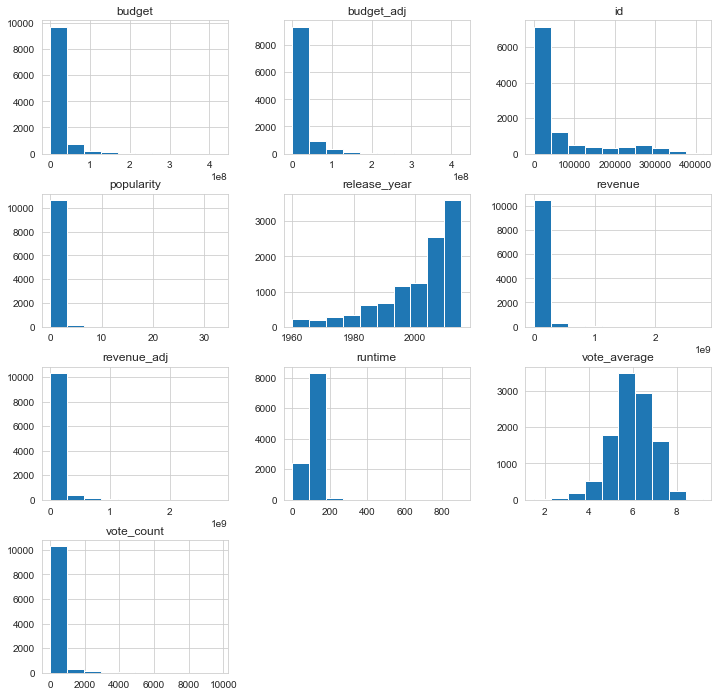

In [95]:
# See all histogram of each column
df.hist(figsize=(12,12))
plt.show()

### Data Cleaning
After observing the data I decide to:
- Drop unused columns (id, imdb_id, budget, revenue, homepage, tagline, keywords, overview, production_companies, release_date, vote_count and vote_average).
- Because budget_adj and revenue_adj have already adjusted inflation rate so I chose to use these 2 columns instead of budget and revenue columns.
- Change 0 values in budget, revenue and runtime column to NaN.
- Drop duplicated values.
- Drop null values.
- Manage columns with muliple values separated by pipe. (cast, director and genres)

In [96]:
# Drop unused columns.
df.drop(['id',
         'imdb_id',
         'budget',
         'revenue',
         'homepage',
         'tagline',
         'keywords',
         'overview',
         'production_companies',
         'release_date',
         'vote_count',
         'vote_average'], axis=1, inplace=True)

In [97]:
# Let see first five rows of the data after drop unused columns.
df.head()

,popularity,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,137999939.28,1392445892.52
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,137999939.28,348161292.49
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,101199955.47,271619025.41
3,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919.04,1902723129.80
4,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015,174799923.09,1385748801.47


In [98]:
# Replace 0 value with NaN
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

In [99]:
# See null values
df.isna().sum()

popularity           0
original_title       0
cast                76
director            44
runtime             31
genres              23
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [100]:
# Drop null values
df.dropna(inplace=True)

In [101]:
# Confirm that the dataset has no null value
df.isna().sum()

popularity        0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [102]:
# See duplicated values
df.duplicated().sum()

1

In [103]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

In [104]:
# Confirm that the dataset has no duplicated value
df.duplicated().sum()

0

In [105]:
# Let see information of the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
popularity        3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 300.7+ KB


In [106]:
# Manage columns with muliple values separated by pipe by use split method to separate values in to many columns.
df_cast = df['cast'].str.split('|', expand=True).rename(columns=lambda x: "cast_{}".format(x + 1))
df_director = df['director'].str.split('|', expand=True).rename(columns=lambda x: "director_{}".format(x + 1))
df_genres = df['genres'].str.split('|', expand=True).rename(columns=lambda x: "genres_{}".format(x + 1))

In [107]:
# Join the separated columns with the original dataframe and see the infomation.
df = df.join([df_cast, df_director, df_genres])
df.drop(['cast', 'director', 'genres'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 28 columns):
popularity        3849 non-null float64
original_title    3849 non-null object
runtime           3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
cast_1            3849 non-null object
cast_2            3845 non-null object
cast_3            3845 non-null object
cast_4            3837 non-null object
cast_5            3815 non-null object
director_1        3849 non-null object
director_2        242 non-null object
director_3        34 non-null object
director_4        10 non-null object
director_5        6 non-null object
director_6        5 non-null object
director_7        3 non-null object
director_8        3 non-null object
director_9        2 non-null object
director_10       2 non-null object
director_11       2 non-null object
director_12       1 non-null object
genres_1          384

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the data, I am ready to answer the questions.

### Research Question 1 Which genres are most popular from year to year? 

In [108]:
# Select all genres columns and release year column then join it together and then store it in a new dataframe
df_genres_years = df.loc[:, 'genres_1':'genres_5'].join(df['release_year'])
df_genres_years.head()

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015
1,Action,Adventure,Science Fiction,Thriller,None,2015
2,Adventure,Science Fiction,Thriller,None,None,2015
3,Action,Adventure,Science Fiction,Fantasy,None,2015
4,Action,Crime,Thriller,None,None,2015


In [109]:
# Select unique year from release year column and store it in years variable
years = df_genres_years['release_year'].unique()

# creates a list of tuples for most popular genres in each year
most_popular = []

# Iterate into years
for year in years:
    # Creates new dataframe filterd by each year in years
    genres_by_year = df_genres_years[df_genres_years['release_year'] == year]
    
    # Drops release_years columns to performs value counts in the next line
    drop_year = genres_by_year.drop(['release_year'], axis = 1)
    
    # Performs value counts of genres and select index of maximum value and store it in 
    popular_genre_name = drop_year.stack().value_counts().idxmax()
    
    # Appends year and most popular genre each year in most_popular list
    most_popular.append((year, popular_genre_name))

# Creates new dataframe to shows most popular genre each year
most_popular_genre = pd.DataFrame(most_popular, columns=['release_year', 'popular_genre'])

In [110]:
# Showing most popular genre each year
most_popular_genre

,release_year,popular_genre
0,2015,Drama
1,2014,Drama
2,1977,Drama
3,2009,Drama
4,2010,Drama
5,1999,Comedy
6,2001,Comedy
7,2008,Drama
8,2011,Drama
9,2002,Drama


In [111]:
# Most popular genres of all years
most_popular_genre['popular_genre'].value_counts()

Drama       41
Comedy      11
Thriller     3
Action       1
Name: popular_genre, dtype: int64

### Research Question 2  What kinds of properties are associated with movies that have high revenues?

In [112]:
# See basic statistics of revenue column
df['revenue_adj'].describe()

count         3849.00
mean     137231318.62
std      216201762.38
min              2.37
25%       18430229.34
50%       61813934.33
75%      163411533.62
max     2827123750.41
Name: revenue_adj, dtype: float64

In [113]:
# Define high revenue movies that have to earn more than the 50% average of all movies and store it in a new dataframe
df_high_revenue = df.query('revenue_adj > 61813934.33')
df_high_revenue.head()

,popularity,original_title,runtime,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,...,director_8,director_9,director_10,director_11,director_12,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.99,Jurassic World,124.00,2015,137999939.28,1392445892.52,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,...,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
1,28.42,Mad Max: Fury Road,120.00,2015,137999939.28,348161292.49,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,...,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
2,13.11,Insurgent,119.00,2015,101199955.47,271619025.41,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,...,None,None,None,None,None,Adventure,Science Fiction,Thriller,None,None
3,11.17,Star Wars: The Force Awakens,136.00,2015,183999919.04,1902723129.80,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,...,None,None,None,None,None,Action,Adventure,Science Fiction,Fantasy,None
4,9.34,Furious 7,137.00,2015,174799923.09,1385748801.47,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,...,None,None,None,None,None,Action,Crime,Thriller,None,None


In [114]:
# See basic infomation of high revenue movies
df_high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 10848
Data columns (total 28 columns):
popularity        1924 non-null float64
original_title    1924 non-null object
runtime           1924 non-null float64
release_year      1924 non-null int64
budget_adj        1924 non-null float64
revenue_adj       1924 non-null float64
cast_1            1924 non-null object
cast_2            1924 non-null object
cast_3            1924 non-null object
cast_4            1924 non-null object
cast_5            1922 non-null object
director_1        1924 non-null object
director_2        136 non-null object
director_3        22 non-null object
director_4        5 non-null object
director_5        2 non-null object
director_6        1 non-null object
director_7        1 non-null object
director_8        1 non-null object
director_9        0 non-null object
director_10       0 non-null object
director_11       0 non-null object
director_12       0 non-null object
genres_1          1924

In [115]:
# Calculated characteristics of high revenue movies.

# Average Polularity
avg_popularity = df_high_revenue['popularity'].mean()

# Average Runtime
avg_runtime = df_high_revenue['runtime'].mean()

# Average Budget
avg_budget = df_high_revenue['budget_adj'].mean()

# Frequent director
director = df_high_revenue.loc[:, 'director_1': 'director_12']
frequent_director = director.stack().value_counts().idxmax()

# Frequent cast
cast = df_high_revenue.loc[:, 'cast_1': 'cast_5']
frequent_cast = cast.stack().value_counts().idxmax()

# Popular genre
genre = df_high_revenue.loc[:, 'genres_1': 'genres_5']
frequent_genre = genre.stack().value_counts().idxmax()

# Release year
release_year = df_high_revenue['release_year'].value_counts().idxmax()

In [116]:
# Create new dataframe to store characteristics of high revenue movies
high_revenue_summary = pd.DataFrame(data=[avg_popularity, avg_runtime, avg_budget, frequent_director, frequent_cast, frequent_genre, release_year], 
                                    index=['avg_popularity', 'avg_runtime', 'avg_budget', 'frequent_director', 'frequent_cast', 'frequent_genre', 'release_year'],
                                    columns=['description']
                                   )

In [117]:
# See the characteristics of high revenue movies
high_revenue_summary

,description
avg_popularity,1.70
avg_runtime,113.63
avg_budget,65804609.15
frequent_director,Steven Spielberg
frequent_cast,Bruce Willis
frequent_genre,Drama
release_year,2011


### Research Question 3 Did movies with higher budget received a better rating?

In [118]:
# See basic statistics of budget column
df['budget_adj'].describe()

count        3849.00
mean     44293601.64
std      44813601.29
min             0.97
25%      13166226.24
50%      30050304.21
75%      60767198.03
max     425000000.00
Name: budget_adj, dtype: float64

In [119]:
# See basic statistics of popularity column
df['popularity'].describe()

count   3849.00
mean       1.19
std        1.48
min        0.00
25%        0.46
50%        0.80
75%        1.37
max       32.99
Name: popularity, dtype: float64

In [120]:
# Eliminates outlier values of popularity column
df_popularity = df.query('popularity < 15')
df_popularity.head()

,popularity,original_title,runtime,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,...,director_8,director_9,director_10,director_11,director_12,genres_1,genres_2,genres_3,genres_4,genres_5
2,13.11,Insurgent,119.00,2015,101199955.47,271619025.41,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,...,None,None,None,None,None,Adventure,Science Fiction,Thriller,None,None
3,11.17,Star Wars: The Force Awakens,136.00,2015,183999919.04,1902723129.80,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,...,None,None,None,None,None,Action,Adventure,Science Fiction,Fantasy,None
4,9.34,Furious 7,137.00,2015,174799923.09,1385748801.47,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,...,None,None,None,None,None,Action,Crime,Thriller,None,None
5,9.11,The Revenant,156.00,2015,124199945.35,490314247.02,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,...,None,None,None,None,None,Western,Drama,Adventure,Thriller,None
6,8.65,Terminator Genisys,125.00,2015,142599937.26,405355075.68,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,...,None,None,None,None,None,Science Fiction,Action,Thriller,Adventure,None


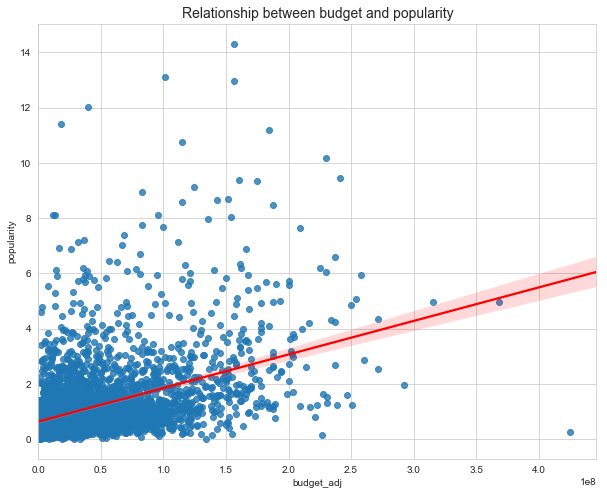

In [121]:
# Visualizes relationship between budget and popularity
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(ax=ax, x="budget_adj", y="popularity", data=df_popularity, line_kws={"color": "r"})
ax.set_title("Relationship between budget and popularity", fontsize=14)
ax.set_xlim(0, None)
plt.show()

In [122]:
# Correlation between popularity and budget
corr = df_popularity.loc[:, ['popularity','budget_adj']].corr()
corr

,popularity,budget_adj
popularity,1.00,0.43
budget_adj,0.43,1.00


### Research Question 4 Which year have most of high popularity movies?

In [123]:
# See basic statistics of popularity column
df['popularity'].describe()

count   3849.00
mean       1.19
std        1.48
min        0.00
25%        0.46
50%        0.80
75%        1.37
max       32.99
Name: popularity, dtype: float64

In [124]:
# Select high popularity movies (popularity more than 75% average of all movies)
df_high_pop = df.query('popularity > 1.37')
df_high_pop.head()

,popularity,original_title,runtime,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,...,director_8,director_9,director_10,director_11,director_12,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.99,Jurassic World,124.00,2015,137999939.28,1392445892.52,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,...,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
1,28.42,Mad Max: Fury Road,120.00,2015,137999939.28,348161292.49,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,...,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
2,13.11,Insurgent,119.00,2015,101199955.47,271619025.41,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,...,None,None,None,None,None,Adventure,Science Fiction,Thriller,None,None
3,11.17,Star Wars: The Force Awakens,136.00,2015,183999919.04,1902723129.80,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,...,None,None,None,None,None,Action,Adventure,Science Fiction,Fantasy,None
4,9.34,Furious 7,137.00,2015,174799923.09,1385748801.47,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,...,None,None,None,None,None,Action,Crime,Thriller,None,None


The cell below shows ranking of years that have high popularity movies.

In [125]:
# Counts high popularity each year
pop_year = df_high_pop.groupby('release_year')['popularity'].count().reset_index()
pop_year.sort_values('popularity', ascending=False).head()

,release_year,popularity
54,2015,103
53,2014,91
52,2013,58
51,2012,56
50,2011,53


Becuase the number of movies each year is varied, I decided to use the proportion of high popularity movies each year instead.

In [126]:
# Counts movies each year
movies_count = df.groupby('release_year')['popularity'].count().reset_index()
movies_count.head()

,release_year,popularity
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7


In [127]:
# Merges movies count each year and high popularity each year
df_pop_year = movies_count.merge(pop_year, on='release_year', suffixes=('', '_high'))

# Calculates the proportion of high popularity movies
df_pop_year['pop_propotion'] = df_pop_year['popularity_high'] / df_pop_year['popularity']

# Shows ranking of high popularity movies sorted by the propotion of high popularity movies
df_pop_year.sort_values('pop_propotion', ascending=False).head()

,release_year,popularity,popularity_high,pop_propotion
54,2015,160,103,0.64
53,2014,165,91,0.55
14,1975,9,4,0.44
4,1964,7,3,0.43
0,1960,5,2,0.40


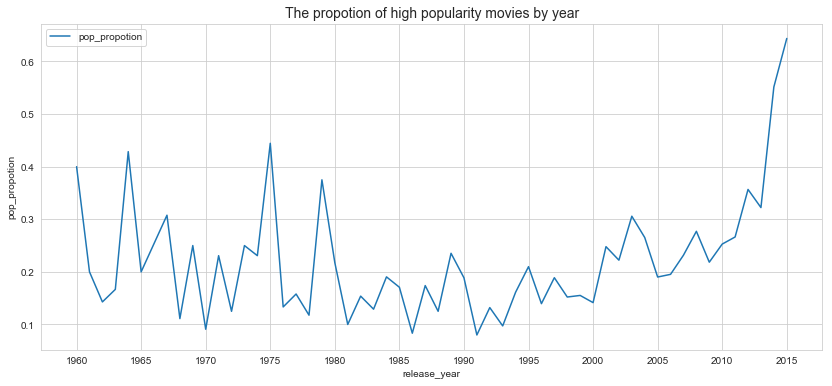

In [128]:
# Visualizes the propotion of high popularity movies by year
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(ax=ax, x="release_year", y="pop_propotion", label="pop_propotion", data=df_pop_year)
ax.set_title("The propotion of high popularity movies by year", fontsize=14)
plt.xticks(np.arange(min(df_pop_year['release_year']), max(df_pop_year['release_year'])+1, 5))
plt.show()

<a id='conclusions'></a>
## Conclusions
After analyzing the dataset I have found interesting insight from research questions as following.

#### Research Question 1 Which genres are most popular from year to year?
The most popular genre that has been produced each year is Drama which appeared in the ranking 41 times.

#### Research Question 2 What kinds of properties are associated with movies that have high revenues?
Most high revenue movies tend to have average popularity at 1.70 points, average runtime at 113.63 minutes, average budget at 65,804,609.15 US dollars, director should be Steven Spielberg, cast should included Bruce Willis and genre should be drama.

#### Research Question 3 Did movies with higher budget received a better rating?
Because budget has a positive relationship with popularity. Therefore, movies with high budgets also result in high popularity.

#### Research Question 4 Which year have most of high popularity movies?
2015 is the year with the most high popularity movies. Which has a propotion of 0.64 of all movies in that year or 103 movies.

### Limitations
1. All results refer to this dataset. Which may not be representative of all movies.
2. This data analysis does not include advance statistical analysis.
3. This dataset does not provide information about currency of budget and revenue columns. So I assumes that is a US dollar.